## Import the needed libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Regression discontinuity: banking recovery

In [80]:
all_data = pd.read_csv('bank_data.csv')
all_data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


### Some important constants

In [81]:
threshold = 1000
lower_range = threshold - 100
upper_range = threshold + 100
lower_range_narrow = threshold - 50
upper_range_narrow = threshold + 50

### Data manipulation will me needed lately

In [82]:
all_data = all_data
filtered_all_data = all_data[(all_data['expected_recovery_amount'] >= lower_range) & (all_data['expected_recovery_amount'] < upper_range)]
filtered_all_data_narrow = all_data[(all_data['expected_recovery_amount'] >= lower_range_narrow) & (all_data['expected_recovery_amount'] < upper_range_narrow)]
filtered_all_data = filtered_all_data.assign(above_threshold = (filtered_all_data['expected_recovery_amount'] >= threshold).astype(int))
filtered_all_data_narrow = filtered_all_data_narrow.assign(above_threshold = (filtered_all_data['expected_recovery_amount'] >= threshold).astype(int))

# Graphical exploratory data analysis

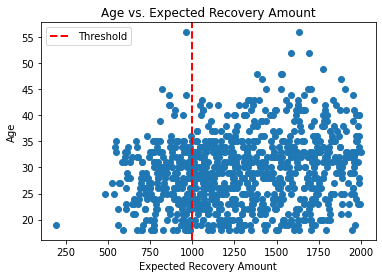

In [83]:
expected_recovery_range = (0, 2000)
all_data_range = all_data[all_data['expected_recovery_amount'].between(*expected_recovery_range)]

# Graphical Representaion
plt.scatter(all_data_range['expected_recovery_amount'], all_data_range['age'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Age')
plt.title('Age vs. Expected Recovery Amount')
plt.axvline(x=1000, color='red', linestyle='dashed', linewidth=2, label='Threshold')
plt.legend()
plt.show()


if the customer age varies smoothly across the $1000 threshold, it would suggest that age does not have a significant influence on how customers are assigned to different recovery strategy levels. This would imply that the bank's strategy of transitioning customers based on expected recovery amounts is not directly related to customer age.

# Statistical test: age vs. expected recovery amount

In [84]:

# Group data into two groups: below and above the threshold
below_threshold_all_data = filtered_all_data[filtered_all_data['expected_recovery_amount'] <= threshold]
above_threshold_all_data = filtered_all_data[filtered_all_data['expected_recovery_amount'] > threshold]

# Calculate the average age for each group
average_age_below = below_threshold_all_data['age'].mean()
average_age_above = above_threshold_all_data['age'].mean()

# Perform a statistical test to compare the average age of the two groups
kruskal_test_wide = stats.kruskal(below_threshold_all_data['age'], above_threshold_all_data['age'])

# Print the results
print("Average Age (Below $1000):", average_age_below)
print("Average Age (Above $1000):", average_age_above)
print("Kruskal Statistic:", kruskal_test_wide.statistic)
print("P-Value:", kruskal_test_wide.pvalue)

# Check if the difference in average age is statistically significant at a 95% confidence level
alpha = 0.05
if kruskal_test_wide.pvalue < alpha:
    print("The difference in average age is statistically significant.")
else:
    print("There is no statistically significant difference in average age.")

Average Age (Below $1000): 27.224719101123597
Average Age (Above $1000): 28.75531914893617
Kruskal Statistic: 3.4572342749517513
P-Value: 0.06297556896097407
There is no statistically significant difference in average age.


# Statistical test: sex vs. expected recovery amount

In [85]:

# Perform a statistical test to compare the proportions of male customers between the two groups
# For this example, we will use a chi-square test
contingency_table = pd.crosstab(filtered_all_data['expected_recovery_amount'] > threshold, filtered_all_data['sex'])
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
print(contingency_table)

# Group data into two groups: below and above the threshold
below_threshold_all_data = filtered_all_data[filtered_all_data['expected_recovery_amount'] <= threshold]
above_threshold_all_data = filtered_all_data[filtered_all_data['expected_recovery_amount'] > threshold]

# Calculate the proportion (percentage) of male customers for each group
proportion_male_below = below_threshold_all_data[below_threshold_all_data['sex'] == 'Male'].shape[0] / below_threshold_all_data.shape[0] * 100
proportion_male_above = above_threshold_all_data[above_threshold_all_data['sex'] == 'Male'].shape[0] / above_threshold_all_data.shape[0] * 100

# Print the results
print("Proportion of Male Customers (Below $1000): {:.2f}%".format(proportion_male_below))
print("Proportion of Male Customers (Above $1000): {:.2f}%".format(proportion_male_above))
print("Chi-Square Statistic:", chi2)
print("P-Value:", p_value)

# Check if the difference in proportion of male customers is statistically significant at a 95% confidence level
alpha = 0.05
if p_value < alpha:
    print("The difference in proportion of male customers is statistically significant.")
else:
    print("There is no statistically significant difference in proportion of male customers.")
    


sex                       Female  Male
expected_recovery_amount              
False                         32    57
True                          39    55
Proportion of Male Customers (Below $1000): 64.04%
Proportion of Male Customers (Above $1000): 58.51%
Chi-Square Statistic: 0.3796422112341753
P-Value: 0.5377947810444592
There is no statistically significant difference in proportion of male customers.


# Exploratory graphical analysis: recovery amount

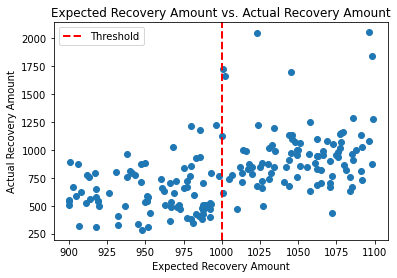

In [86]:
# Create a scatter plot of Expected Recovery Amount (Y) vs. Actual Recovery Amount (X)
plt.scatter(filtered_all_data['expected_recovery_amount'], filtered_all_data['actual_recovery_amount'])
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.title('Expected Recovery Amount vs. Actual Recovery Amount')
plt.axvline(x=threshold, color='red', linestyle='dashed', linewidth=2, label='Threshold')
plt.legend()
plt.show()

# Statistical analysis: recovery amount

In [87]:
# Split the data into groups above and below the threshold
above_threshold = filtered_all_data[filtered_all_data['expected_recovery_amount'] > threshold]
below_threshold = filtered_all_data[filtered_all_data['expected_recovery_amount'] <= threshold]

# Step 3: Perform the Kruskal-Wallis test for the wider range $900 to $1100
kruskal_test_wide = stats.kruskal(above_threshold['actual_recovery_amount'], below_threshold['actual_recovery_amount'])

# Step 4: Print the results for the wider range
print("Kruskal-Wallis Test for $900 to $1100")
print("Statistic:", kruskal_test_wide.statistic)
print("P-Value:", kruskal_test_wide.pvalue)

alpha = 0.05
if kruskal_test_wide.pvalue < alpha:
    print("There is a significant difference in the actual recovery amount for $900 to $1100 range.")
else:
    print("There is no significant difference in the actual recovery amount for $900 to $1100 range.")

# Step 6: Split the data into groups above and below the threshold for the narrower range
above_threshold_narrow = filtered_all_data_narrow[filtered_all_data_narrow['expected_recovery_amount'] > threshold]
below_threshold_narrow = filtered_all_data_narrow[filtered_all_data_narrow['expected_recovery_amount'] <= threshold]

# Step 7: Perform the Kruskal-Wallis test for the narrower range $950 to $1050
kruskal_test_narrow = stats.kruskal(above_threshold_narrow['actual_recovery_amount'], below_threshold_narrow['actual_recovery_amount'])

# Step 8: Print the results for the narrower range
print("\nKruskal-Wallis Test for $950 to $1050")
print("Statistic:", kruskal_test_narrow.statistic)
print("P-Value:", kruskal_test_narrow.pvalue)

if kruskal_test_narrow.pvalue < alpha:
    print("There is a significant difference in the actual recovery amount for $950 to $1050 range.")
else:
    print("There is no significant difference in the actual recovery amount for $950 to $1050 range.")


Kruskal-Wallis Test for $900 to $1100
Statistic: 65.37966302528878
P-Value: 6.177308752803109e-16
There is a significant difference in the actual recovery amount for $900 to $1100 range.

Kruskal-Wallis Test for $950 to $1050
Statistic: 30.246000000000038
P-Value: 3.80575314300276e-08
There is a significant difference in the actual recovery amount for $950 to $1050 range.


# Regression modeling: no threshold

In [88]:
# Create Model 1 - Simple linear regression without a threshold
X_model1 = sm.add_constant(filtered_all_data['expected_recovery_amount'])
y_model1 = filtered_all_data['actual_recovery_amount']
model1 = sm.OLS(y_model1, X_model1).fit()

# Print the model summary
print("Model 1 (Without Threshold) - $900 to $1100")
print(model1.summary())

Model 1 (Without Threshold) - $900 to $1100
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Mon, 24 Jul 2023   Prob (F-statistic):           1.56e-13
Time:                            02:42:49   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

# Regression modeling: adding true threshold

In [89]:
# Create Model 2 - Piecewise linear regression with a threshold at $1000
# Create an indicator variable to represent whether the expected recovery amount is above the threshold
X_model2 = sm.add_constant(filtered_all_data[['expected_recovery_amount', 'above_threshold']])
y_model2 = filtered_all_data['actual_recovery_amount']
model2 = sm.OLS(y_model2, X_model2).fit()

# Print the model summaries for the $900 to $1100 window
print("\nModel 2 (With Threshold) - $900 to $1100")
print(model2.summary())

impact_estimate = model2.params['above_threshold']
confidence_interval_lower = model2.conf_int(alpha=0.05).loc['above_threshold', 0]
confidence_interval_upper = model2.conf_int(alpha=0.05).loc['above_threshold', 1]

print("\nEstimated Impact of Higher Recovery Strategy:", impact_estimate)
print("95% Confidence Interval for the Impact: [{}, {}]".format(confidence_interval_lower, confidence_interval_upper))


Model 2 (With Threshold) - $900 to $1100
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Mon, 24 Jul 2023   Prob (F-statistic):           1.83e-15
Time:                            02:42:49   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

# Regression modeling: adjusting the window

In [90]:
# Create Model 1 - Simple linear regression without a threshold for the $950 to $1050 window
X_model1_narrow = sm.add_constant(filtered_all_data_narrow['expected_recovery_amount'])
y_model1_narrow = filtered_all_data_narrow['actual_recovery_amount']
model1_narrow = sm.OLS(y_model1_narrow, X_model1_narrow).fit()

# Create Model 2 - Piecewise linear regression with a threshold at $1000 for the $950 to $1050 window
# Create an indicator variable to represent whether the expected recovery amount is above the threshold
X_model2_narrow = sm.add_constant(filtered_all_data_narrow[['expected_recovery_amount', 'above_threshold']])
y_model2_narrow = filtered_all_data_narrow['actual_recovery_amount']
model2_narrow = sm.OLS(y_model2_narrow, X_model2_narrow).fit()

# Step 8: Print the model summaries for the $950 to $1050 window
print("\nModel 1 (Without Threshold) - $950 to $1050")
print(model1_narrow.summary())

print("\nModel 2 (With Threshold) - $950 to $1050")
print(model2_narrow.summary())



Model 1 (Without Threshold) - $950 to $1050
                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.234
Model:                                OLS   Adj. R-squared:                  0.226
Method:                     Least Squares   F-statistic:                     29.64
Date:                    Mon, 24 Jul 2023   Prob (F-statistic):           3.92e-07
Time:                            02:42:49   Log-Likelihood:                -696.22
No. Observations:                      99   AIC:                             1396.
Df Residuals:                          97   BIC:                             1402.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------